# Taller T3 Pirámides Binomiales

<table align='left'>
<tr>
<td><img src='https://bitcoinist.com/wp-content/uploads/2019/12/30-December-1-e1577702026209.jpg' width='850'/> </td>
</tr>
</table>


**Este trabajo fue desarrollado por los siguientes autores identificados al inicio del cuaderno en conformidad con el código de honor UTFSM, todo recurso externo utilizado fue mencionado en las referencias.**

|      Nombre       |     ROL     |
|-------------------|-------------|
| Sofía Riquelme    | 202073615-4 |
| Vicente Ruiz      | 202073585-9 |
| Bayron Valenzuela | 202073580-8 |


Imagine que el valor de cierta criptomoneda evoluciona con incrementos diarios independientes de manera que el $i$-ésimo día

\begin{eqnarray}
Z_{i+1} &= \left\{ \begin{array}{rl} 
2\cdot Z_{i} & \mbox{ con probabilidad} \ p\\
1/2 \cdot Z_{i} & \mbox{ con probabilidad} \ 1-p\\
\end{array} \right. \ \ \ \forall i=1,2,\ldots
\end{eqnarray}


Si definimos $Y_i=\log_2(Z_i)$, lo anterior es equivalente a escribir

\begin{eqnarray}
Y_{i+1} & = Y_{i} + X_i \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

donde $X_i$ es una v.a. discreta de Rademacher (que toma el valor $1$ con probabilidad $p$ y el valor $-1$ con probabilidad $1-p$).

Suponga que valor actual de la moneda es $Z_0=1$ (de modo que $Y_0=0$).

# Actividades


1.   Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p. 

2.   Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?

3.   Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$? 

4.   Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?

5.   Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación. 

6.  Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas. 

7.  Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida. 


# Disclaimer

La situación expuesta en este taller no tiene relación oficinal con ninguna criptomoneda y no representa consejo de inversión alguno.

***

# Desarrollo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
from scipy.stats import mode, binom, nbinom, geom
import random
from math import factorial
from math import log

## Pregunta 1
Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p. 

Podemos ver que $Z_n$ sigue una distribución binomial, partiendo con un valor inicial dado: $Z_0=1$, al construir el triángulo de pascal e identificar los posibles valores que puede tomar, podemos ver que las cantidades pares e impares son muy similares y solo se diferencian en dos terminos, los cuales pueden ser añadidos mediante recursión. Los nuevos valores que se formen estarán dados por $2^i$ y $2^{-i}$. Podemos ahora definir los posibles valores de la moneda n días hacia adelante ($V_n$ indicando los posibles valores) de forma recursiva de la siguiente forma.

\begin{eqnarray}
    V_{n} &= \left\{ 
    \begin{array}{ll} 
        \{1\} & \mbox{} \ n=0\\
        \{2^1, 2^{-1}\} & \mbox{} \ n=1\\
        \{2^i, 2^{-i}\} \cup V_{n-2} & \mbox{ etoc}
    \end{array} \right. \ \ \ \forall n=0,1,2,\ldots
\end{eqnarray}

Como bien se mencionó, Z sigue una distribución binomial con parámetros (n,p), por lo que su f.d.p. es:


\begin{eqnarray}
    f(x) &= \left\{ 
    \begin{array}{ll} 
        \begin{pmatrix}
            n \\
            x 
        \end{pmatrix}p^x(1-p)^{n-x} & \mbox{si} \ x\in\{0,1,2,\ldots,n \}\\
        0 & \mbox{etoc}
    \end{array} \right. \ \ \ \forall n=1,2,\ldots
\end{eqnarray}


In [ ]:
def V2(n):
    ans = set()
    while(n >= 0):
        ans.add(2**n)
        ans.add(2**-n)
        n-=2
    return ans

In [ ]:
def V(n):
    if n == 0:
        return {1}
    if n == 1:
        return {2**1, 2**-1}
    ans = {2**-n, 2**n}
    ans.update(V(n-2))
    return ans

In [ ]:
n = int(input("Ingrese un valor para n: "))
print("Los posibles valores para n son:", V(n))

Ingrese un valor para n: 6
Los posibles valores para n son: {0.015625, 64, 0.0625, 16, 0.25, 1, 4}


## Pregunta 2

Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?

In [ ]:
def combinatoria(n, x):
    return factorial(n) // (factorial(x) * factorial(n - x))

def Binomial(n,p,x):
    if 0 <= x and x <= n:
        return combinatoria(n,x) * p**x * (1-p)**(n-x)
    return 0

def simulation(n,p, cant):
    weights = [p, 1-p]
    options = [2, 1/2]
    return np.array([np.prod(random.choices(options, weights=weights, k=n)) for i in range(cant)])

Lo que se realizó en la función `simulation(n,p, cant)` es una simulación generalizada para un n y p dados. Lo que hace es calcular `cant` veces $Z_n$ y retorna un array de numpy con los resultados de cada uno de los $Z_n$ calculados.

A continuación realizaremos dos simulaciones, la primera con $n=10, p=\frac{3}{5}$ y la segunda con $n=10, p=\frac{1}{2}$.

In [ ]:
print(f"El valor más probable para n=10 y p=3/5 es: {mode(simulation(10,3/5,10000))[0][0]}")
print(f"El valor más probable para n=10 y p=1/2 es: {mode(simulation(10,1/2,10000))[0][0]}")

El valor más probable para n=10 y p=3/5 es: 4.0
El valor más probable para n=10 y p=1/2 es: 1.0


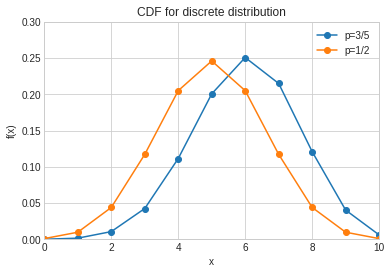

In [ ]:
x=np.arange(0,20)
fx1=np.array([Binomial(10,3/5,i) for i in range(0,20)])
fx2=np.array([Binomial(10,1/2,i) for i in range(0,20)])

plt.plot(x,fx1, marker="o",label="p=3/5")
plt.plot(x,fx2, marker="o",label="p=1/2")
plt.xlim(0,10)
plt.ylim(0,.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("CDF for discrete distribution")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

Podemos ver que en el caso de $p=\frac{1}{2}$ es simétrico, no así en el caso de $p=\frac{3}{5}$, en donde el gráfico tiene un sesgo negativo.

In [ ]:
def fdpZn(n, p):
    vals = list(V(n))
    vals.sort(reverse=True)
    probs = []
    x = n
    for item in vals:
        probs.append(Binomial(n, p, x))
        x -= 1
    return list(zip(vals, probs))

## Pregunta 3

Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$?

In [ ]:
# Calcula la esperanza para n y p, elevada interiormente a x
def expected_value_pow(n,p,x):
    return np.cumsum([(value**x)*prob for value, prob in fdpZn(n,p)])[-1]

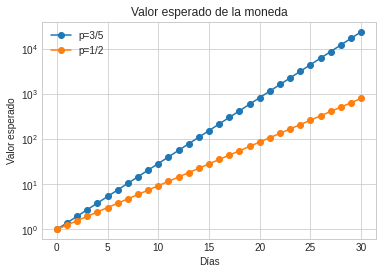

In [ ]:
days = np.arange(0,31)
expected_values1 = np.array([expected_value_pow(i,3/5,1) for i in range(0,31)]) 
expected_values2 = np.array([expected_value_pow(i,1/2,1) for i in range(0,31)]) 


plt.plot(days,expected_values1, marker="o",label="p=3/5")
plt.plot(days,expected_values2, marker="o",label="p=1/2")
plt.xlabel("Días")
plt.ylabel("Valor esperado")
plt.title("Valor esperado de la moneda")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.yscale("log")
plt.show()

Se puede observar que el valor esperado de la moneda sube de manera exponencial cuando $p = \frac{3}{5}$, sin embargo, cuando $p = \frac{1}{2}$, el valor esperado de la moneda se mantiene, a excepción de los últimos días

In [ ]:
def variance(n,p):
    return(expected_value_pow(n,p,2) - (expected_value_pow(n,p,1))**2)

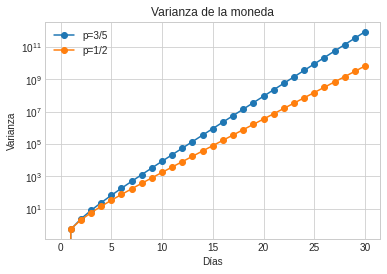

In [ ]:
variance1 = np.array([variance(i,3/5) for i in range(31)]) 
variance2 = np.array([variance(i,1/2) for i in range(31)]) 

plt.plot(days,variance1, marker="o",label="p=3/5")
plt.plot(days,variance2, marker="o",label="p=1/2")
plt.xlabel("Días")
plt.ylabel("Varianza")
plt.title("Varianza de la moneda")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.yscale("log")
plt.show()

In [ ]:
print(variance(30,3/5))
print(variance(30,1/2))

866776028660.3457
6617976373.861496


Ahora en el caso de la varianza, nuevamente cuando $p = \frac{3}{5}$ sube de manera exponencial, pero esta vez sube de manera mucho más pronunciada. De la misma manera se puede observar que en relación a $p = \frac{3}{5}$, cuando $p = \frac{1}{2}$ la varianza del valor de la moneda se mantiene prácticamente cosntante.

## Pregunta 4
Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?

In [ ]:
# con 50000 casos de prueba se demora aprox 46s
# con 100000 casos de prueba se demora aprox 94s
# con 1000000 casos de prueba se demora aprox 984s (si, lo probamos)
cantidad_de_pruebas = 10000
simulaciones1 = [list(simulation(i,1/2, cantidad_de_pruebas)) for i in range(31)]
simulaciones2 = [list(simulation(i,3/5, cantidad_de_pruebas)) for i in range(31)]

In [ ]:
esperanzas1 = [st.mean(simulaciones1[i]) for i in range(31)]
varianzas1 = [st.variance(simulaciones1[i]) for i in range(31)]

esperanzas2 = [st.mean(simulaciones2[i]) for i in range(31)]
varianzas2 = [st.variance(simulaciones2[i]) for i in range(31)]

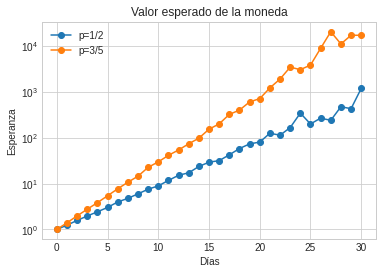

In [ ]:
plt.plot(days,esperanzas1, marker="o",label="p=1/2")
plt.plot(days,esperanzas2, marker="o",label="p=3/5")
plt.xlabel("Días")
plt.ylabel("Esperanza")
plt.title("Valor esperado de la moneda")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.yscale("log")
plt.show()

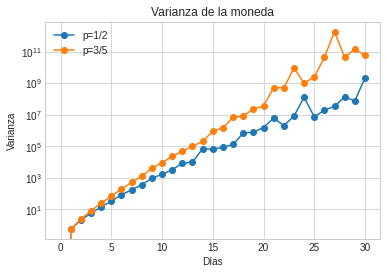

In [ ]:
plt.plot(days,varianzas1, marker="o",label="p=1/2")
plt.plot(days,varianzas2, marker="o",label="p=3/5")
plt.xlabel("Días")
plt.ylabel("Varianza")
plt.title("Varianza de la moneda")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.yscale("log")
plt.show()

## Pregunta 5
 Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación. 


In [ ]:
def I(n):
    return (1.35)**n

In [ ]:
def graficar_prob_perdida(rango):
    prob_perdida = []
    for n in range(0,rango):
        datos = fdpZn(n, 3/5)
        impuesto = I(n)
        prob = 0
        for item in datos:
            if(item[0]-impuesto < 0):
                prob += item[1]
        if(n==30):
            prob_perdida_30 = prob
        prob_perdida.append(prob)

    x=np.arange(0,rango)
    perdida = np.array(prob_perdida)
    plt.plot(x,perdida,marker = ".")
    plt.xlim(0,rango)
    plt.xlabel("Días")
    plt.ylabel("probabilidad acumulada de perdida")
    plt.title("Probabilidad de perdida a lo largo de los dias")
    plt.axvline(x = 30, color = 'r', linestyle = '--',label = 'primer mes', linewidth=1)
    plt.axhline(y = prob_perdida_30, color = 'r', linestyle = '--', linewidth=1)
    plt.text(32, prob_perdida_30-0.075, '({}, {})'.format(30, round(prob_perdida_30, 4)))
    plt.legend()
    plt.yscale("log")
    plt.style.use('seaborn-whitegrid')
    plt.show()

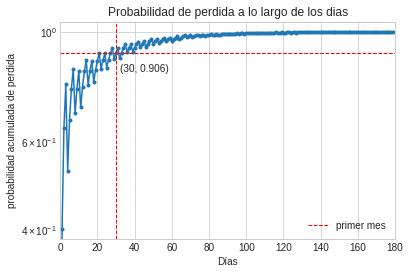

In [ ]:
graficar_prob_perdida(180)

Se observa que despues del primer mes la probabilidad de perdida tiende por sobre 0.9, acercandose cada vez mas a 1 a medida que se llega al sexto mes.



####Valor esperado de la utilidad

In [ ]:
def utilidades(n,p):
    values = fdpZn(n,p)
    u = []
    tax = I(n)
    for value,prob in values:
        a = tuple([value-tax, prob])
        u.append(a)
    return u

def E_utilidad(n,p):
    u = utilidades(n,p)
    valor_esperado = 0
    for utilidad,prob in u:
        valor_esperado += utilidad*prob
    return valor_esperado

In [ ]:
def graficar_esperado_utilidad(rango):  
    esperado_utilidad_log = []
    for i in range(0, rango):
        if(i==30):
            utilidad_esperada_30 = E_utilidad(i,3/5)
            esperado_utilidad_log.append(utilidad_esperada_30)
        else:
            esperado_utilidad_log.append(E_utilidad(i,3/5))

    x=np.arange(0,rango)
    esperado_utilidad = np.array(esperado_utilidad_log)
    plt.plot(x,esperado_utilidad)
    plt.xlim(0,rango)
    plt.xlabel("Días")
    plt.ylabel("Valo esperado de la utilidad")
    plt.title("Valor esperado de la utilidad a lo largo de los dias")
    plt.axvline(x = 30, color = 'r', linestyle = '--',label = 'primer mes', linewidth=1)
    plt.axhline(y = utilidad_esperada_30, color = 'r', linestyle = '--', linewidth=1)
    plt.text(40, utilidad_esperada_30+10, '({}, {})'.format(30, round(utilidad_esperada_30, 4)))
    plt.style.use('seaborn-whitegrid')
    plt.yscale("log")
    plt.show()

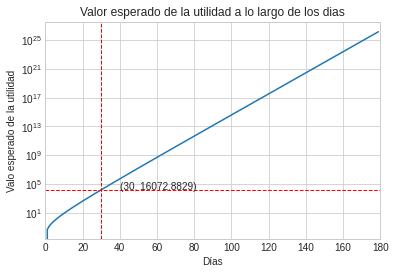

In [ ]:
graficar_esperado_utilidad(180)

### Interpretacion
Despues del dia 30, es decir luego del primer mes, se observa que la probabilidad de perdida se acerca a 1, pero al mismo tiempo el valor esperado de la utilidad incrementa. El fenomeno anterior se explica dado que, en el mejor de los casos un valor de Zn tiene un valor de $2^n$, mientras que el impuesto solo llega a $1.35^n$, por lo cual para valores de n cada vez mas grandes, esta diferencia se acrecenta. Finalmente llega a valores tan grandes, que a pesar de tener probabilidades bajas, sesga todo el valor esperado a incrementar.

### Conviene comprar la moneda si se va a vender luego del primer mes?
Nuestro analisis estadistico anterior, donde se observa la enorme probabilidad de perdida luego de 30 dias indica que no, a pesar de que exista una muy leve probabilidad de ganar mucho dinero, observado en el sesgo del grafico de valor esperado de utilidades.

Para ahondar en este punto realizamos la siguiente simulacion

In [ ]:
def simular_utilidad(p, desde, hasta):
    perdida=0
    total = hasta-desde
    for i in range(desde,hasta):
        x = simulation(i,p,1)[0]
        x -= I(i)
        if(x<1):
            perdida+=1
    return perdida/total

def prob_prom_perdida(cantidad, p, desde, hasta):
    total=0
    for i in range(cantidad):
        total += simular_utilidad(p,desde,hasta)
    return total/cantidad

In [ ]:
print("Probabilidad promedio de perdida:", prob_prom_perdida(1000,1/2,30,180))

Probabilidad promedio de perdida: 0.999333333333334


Concluimos que no es prudente comprar la moneda si se va a vender luego del primer mes.

## Pregunta 6
Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas.

In [ ]:
def alzas_5(dias,p):
    contador = 0
    for i in range(dias):
        x = simulation(i,p,1)[0]
        y = simulation(i+1,p,1)[0]

        if(x-y<0):
            contador+=1
        if(x-y>=0):
            contador=0
        if(contador==5):
            return True
    return False

def prob_alza(n,p,rep):
    positivos = 0
    for i in range(rep):
        dato = alzas_5(n,p)
        if(dato==True):
            positivos+=1
    return positivos/rep

Entonces la probabilidad que durante los primeros 14 dias ocurra una racha de 5 o mas alzas seguidas es de:

In [ ]:
print(prob_alza(14,1/2,1500))

0.16533333333333333


## Pregunta 7
Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida. 

In [ ]:
def z_aleatorio(prob, z_prev):
    num = random.uniform(0,1)
    if num >= prob:
        return 2*z_prev
    else:
        return 0.5 * z_prev

In [ ]:
def prob_until_5(prob):
    d = 0
    initial_value = 1
    consec_rises = 0
    while consec_rises < 5:
        value = z_aleatorio(prob,initial_value)
        if value > initial_value:
            consec_rises += 1
        else:
            consec_rises = 0
        d+=1
        initial_value = value
    return d


In [ ]:
def get_unique(l):
    unique = dict(zip(l,[l.count(i) for i in l]))
    return unique

In [ ]:
def obtain_prob(dict):
    days = list(dict.values())
    total_days = sum(days)
    probs = []
    for day in dict:
        prob = dict[day]/total_days
        t = (day, prob)
        probs.append(t)
    return probs

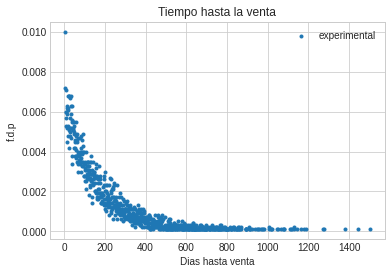

In [ ]:
days_until5 = [prob_until_5(3/5) for i in range(10000)]

unique_days = get_unique(days_until5)
probs = obtain_prob(unique_days)

days = [days[0] for days in probs]
prob = [days[1] for days in probs]

plt.scatter(days,prob, marker=".", label = 'experimental')
plt.ylabel("f.d.p")
plt.xlabel("Dias hasta venta")
plt.title("Tiempo hasta la venta")
plt.style.use('seaborn-whitegrid')
plt.legend()
plt.show()

### Se observa una curva que se asemeja a un distribucion geométrica

In [ ]:
def geometrica_5(p):
    fig, ax = plt.subplots(1, 1)  
    x = np.arange(1,180)

    ax.plot(x, geom.pmf(x, p**5), '.',ms=8, label='fdp geometrica')
    rv = geom(p**5)
    ax.legend(loc='best', frameon=False)

    plt.title("Tiempo hasta la venta distribucion geometrica")
    plt.style.use('seaborn-whitegrid')
    plt.xlabel("dias que toma en ocurrir p^5")
    plt.ylabel("funcion de probabilidad")
    plt.style.use('seaborn-whitegrid')
    plt.show()

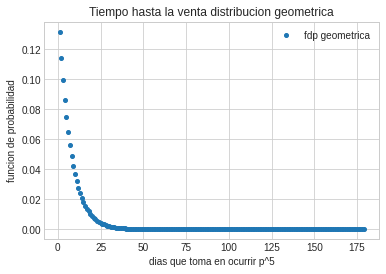

In [ ]:
geometrica_5(2/3)

### Ahora estimando la utilidad

In [ ]:
def utilidad_when_5(prob):
    d = 0
    initial_value = 1
    consec_rises = 0
    while consec_rises < 5:
        value = z_aleatorio(prob,initial_value)
        if value > initial_value:
            consec_rises += 1
        else:
            consec_rises = 0
        d+=1
        initial_value = value
    return (d, initial_value - I(d))

In [ ]:
print(utilidad_when_5(3/5))

(73, -3268625015.513417)


In [ ]:
def datos_utilidad(p, rep):
    days_until5_utilidad = [utilidad_when_5(p) for i in range(rep)]

    days = []
    utilidad = []

    for i in range(rep):
        days.append(days_until5_utilidad[i][0])
        utilidad.append(days_until5_utilidad[i][1])
    
    return [days, utilidad]

In [ ]:
datos = datos_utilidad(3/5, 20000)

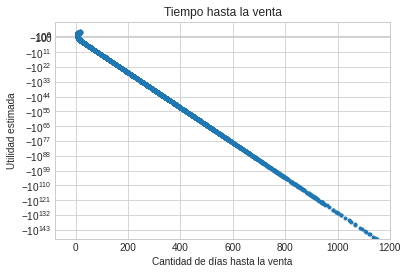

In [ ]:
plt.scatter(datos[0],datos[1], marker=".")
plt.ylabel("Utilidad estimada")
plt.xlabel("Cantidad de días hasta la venta")
plt.title("Tiempo hasta la venta")
plt.style.use('seaborn-whitegrid')
plt.yscale("symlog")
plt.ylim(-1e150,1e10)
plt.xlim(right=1200)
plt.show()

Como la curva se asemeja más a la distribución geométrica, podemos decir que la f.d.p. es la misma a esta última., donde $p=\left(\frac{1}{2}\right)^5$

\begin{eqnarray}
f(x) &= \left\{ \begin{array}{rl} 
(1-p)^{x-1}p & \mbox{ si } \ x=1,2,\ldots\\
0 & \mbox{ etoc} \ \\
\end{array} \right. \ \ \
\end{eqnarray}

# Referencias
* https://geo-python.github.io/2017/lessons/L7/pandas-plotting.html
* https://www.pythonpool.com/python-count-unique-values-in-list/
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html